In [66]:
#Importing libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures 


def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap( corr, cmap = cmap, square=True, cbar_kws={ 'shrink' : .9 },  ax=ax, annot = True, annot_kws = { 'fontsize' : 12 }

        )
df = pd.read_csv("kc_house_data.csv")

#drop non useful features    

df=df.drop('zipcode',axis=1)
df=df.drop('date',axis=1)
df=df.drop('id',axis=1)
df.head()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


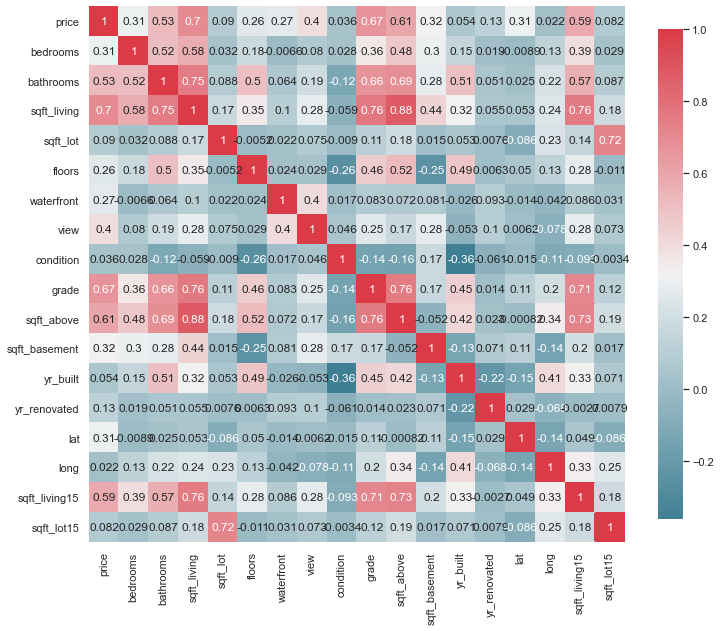

In [27]:
# plot corr matrix table
df.corr()

plot_correlation_map( df )
#High correlation between price and (sqft living, grade sqft above and sqft living 15)

In [47]:
plt = df.waterfront.value_counts().plot(kind='bar') 
plt.set_xlabel('waterfront or not')
plt.set_ylabel(' Count')

#majority of houses don't have waterfronts

In [48]:

#majority of houses are one floor houses then two floor houses

plt = df.floors.value_counts().plot(kind='bar') 
plt.set_xlabel('floors ')
plt.set_ylabel(' Count')



In [49]:
df.plot(x='floors', y='price');


In [50]:
# V = 'sqft_living15'
# df = pd.concat([df['price'], df[var]], axis=1)
# df.plot.scatter(x=V, y='price');

In [ ]:
V2 = 'bedrooms'
df = pd.concat([df['price'], df[V2]], axis=1)
df.plot.scatter(x=V2, y='price');




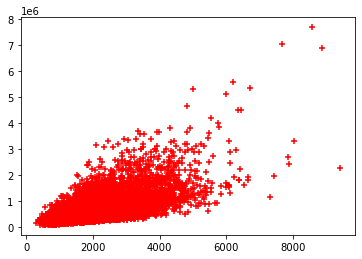

In [12]:
# plt.xlabel=('sqft_living')
# plt.ylabel=('price')
# plt.scatter(df.sqft_above,df.price,color='red', marker='+')

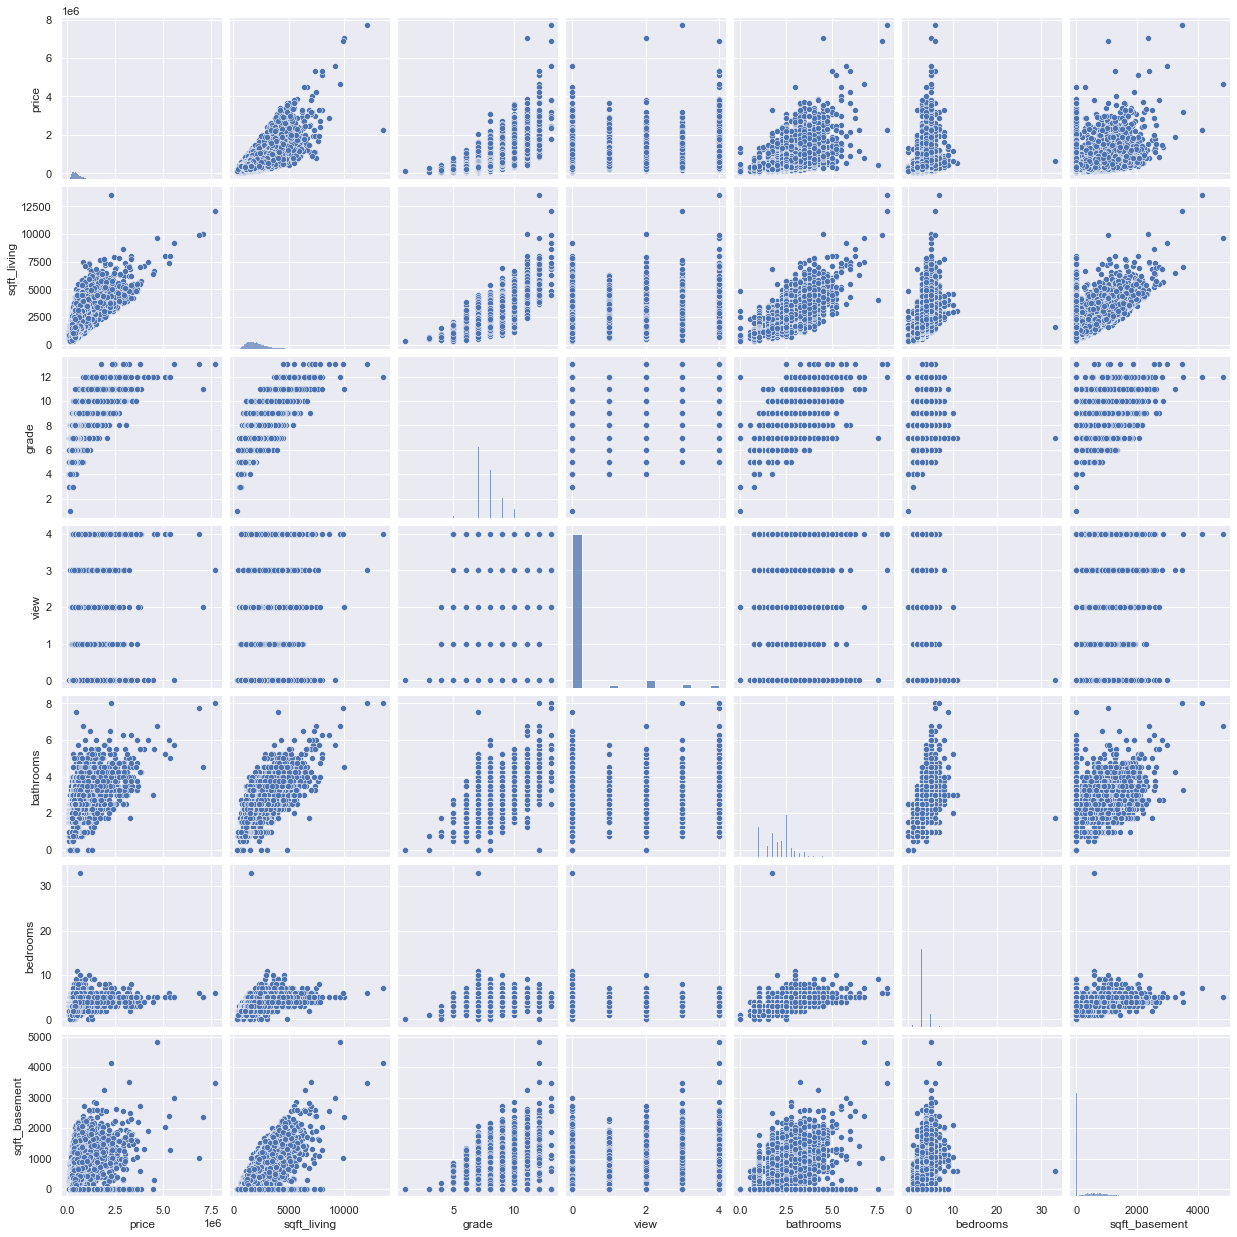

In [32]:
#Pairplot
sns.set()
cols = ['price', 'sqft_living', 'grade', 'view', 'bathrooms','bedrooms','sqft_basement']
sns.pairplot(df[cols])
plt.show()

MSE 62902408306.865036
R squared 0.4996528488387416


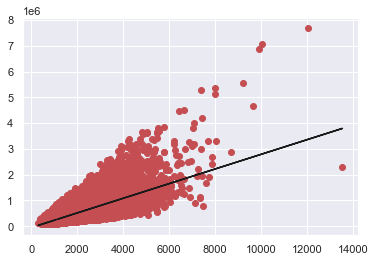

In [54]:
x=df['sqft_living']
y=df['price']
x=x.values.reshape(-1, 1)
x.shape

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

model=LinearRegression()   #build linear regression model
model.fit(x_train,y_train)  #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance


print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

plt.scatter(x,y,color="r")
# plt.title("Linear Regression")
# plt.ylabel("price")
# plt.xlabel("sqftliving")
plt.plot(x,model.predict(x),color="k")
plt.show()

In [65]:
#multi linear regression
x=df[['sqft_living','grade','sqft_above','sqft_living15']]
y=df['price']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

model=LinearRegression()   #build linear regression model
model.fit(x_train,y_train)  #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance


print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

# plt.scatter(x,y,color="r")
# # plt.title("mulri Linear Regression")
# # plt.ylabel("price")
# # plt.xlabel("sqftliving")
# plt.plot(x,model.predict(x),color="k")
# plt.show()

MSE 56391021662.118774
R squared 0.5514466329799553


MSE:  58237063962.546425
R squared:  0.5367625846135378


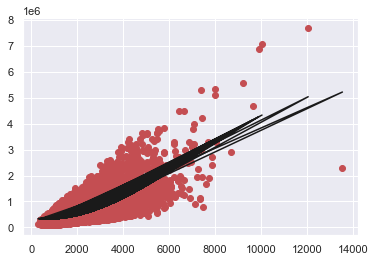

In [78]:

x= df[['sqft_living']]
y= df["price"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=40)  #splitting data
lg=LinearRegression()
poly=PolynomialFeatures(degree=3)

x_train_fit = poly.fit_transform(x_train) #transforming our input data
lg.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
predicted = lg.predict(x_test_)

print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))


plt.scatter(x, y, color="r")
# plt.title("Linear regression")
# plt.ylabel("price")
# plt.xlabel("sqftliving")
plt.plot(x, lg.predict(poly.fit_transform(x)), color="k") 

